# Home task: PCA + Apriori

## Part 1: PCA

__Task__: Apply PCA to breast cancer dataset and visualize 2 principle components.

Loading dataset

In [127]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

Splitting dataset into train and test

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Standardizing dataset

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Applying PCA

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

print(f"Previous shape: {X_train.shape}")

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(f"New shape: {X_train.shape}")

Previous shape: (455, 30)
New shape: (455, 2)


Plotting data

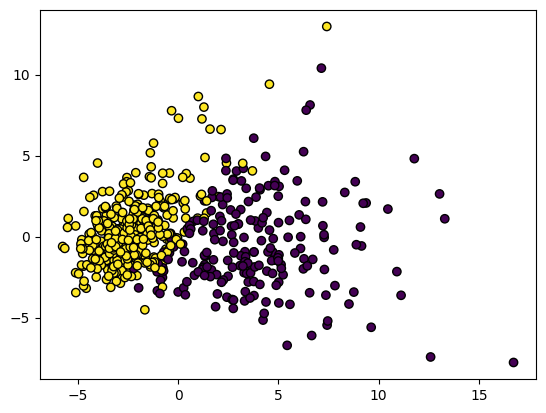

In [131]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='black')

## Part 2: Apriori

__Task__: Mine top 10 association rules worth recommending for Groceries dataset

In [132]:
import pandas as pd

df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

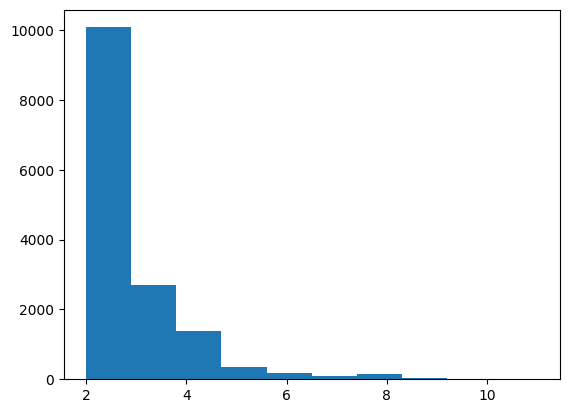

In [133]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [134]:
len(df)

38765

In [135]:
import matplotlib.pyplot as plt

cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()

transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]
transactions[:5]

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve

In [136]:
from apyori import apriori

rules = list(apriori(transactions = transactions, min_support = 0.0025, min_confidence = 0.1, min_lift = 2, min_length = 2, max_length = 2))

In [138]:
def make_rule_df(rules):
    rules_rhs = []
    for rule in rules:
        rules_rhs.append({'antecedents': rule.ordered_statistics[0].items_base,
                          'consequents': rule.ordered_statistics[0].items_add, 
                          'support': rule.support, 
                          'confidence': rule.ordered_statistics[0].confidence, 
                          'lift': rule.ordered_statistics[0].lift})
    return pd.DataFrame(rules_rhs, columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']).sort_values(by='lift', ascending=False)

rules_df = make_rule_df(rules)
# Top 10 rules
rules_df.head(10)

,antecedents,consequents,support,confidence,lift
4,(potato products),(beef),0.002565,0.454545,3.802185
50,(sparkling wine),(waffles),0.002565,0.217391,3.150154
42,(rice),(napkins),0.003079,0.244898,3.011395
29,(meat spreads),(domestic eggs),0.003592,0.400000,3.004239
45,(photo/film),(white wine),0.002565,0.129870,2.943220
3,(rice),(UHT-milk),0.002822,0.224490,2.859677
35,(roll products),(hard cheese),0.003079,0.150000,2.811058
14,(condensed milk),(processed cheese),0.002565,0.107527,2.794265
46,(syrup),(pip fruit),0.002565,0.476190,2.791264
11,(soups),(chicken),0.003335,0.270833,2.693134
